# Regularitation

## Compute Cost Regularization

In [86]:
def compute_cost_reg(AL, Y, parameters, lambd):
    
    m = Y.shape[1]
    
    l = len(parameters)//2
    

    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost) 
    reg_costs = 0
    
    for i in range(1, l):
        reg_cost = np.sum(np.square(parameters["W"+str(i)]))
        reg_costs = reg_costs + reg_cost
        
    reg_costs = lambd* reg_costs/(2* m)
    reg_costs = np.squeeze(reg_costs)
    
    reg_net_cost = reg_costs + cost
    
    assert(reg_net_cost.shape == ())
    
    return cost

## Linear Backward Regularization

In [87]:
def linear_backward_reg(dZ, cache, lambd):
   
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T) + (lambd * W)/ m 
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

## Linear Activation Backward

In [88]:
def linear_activation_backward_reg(dA, cache, lambd, activation):
   
    linear_cache, activation_cache = cache
    lambd = lambd
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_reg(dZ, linear_cache, lambd)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_reg(dZ, linear_cache, lambd)
    
    return dA_prev, dW, db

## linear Model Backward Regularization

In [89]:
def L_model_backward_reg(AL, Y, caches, lambd):
   
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    lambd = lambd
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward_reg(dAL, current_cache, lambd,  activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward_reg(grads["dA" + str(l + 1)], current_cache, lambd, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

## Model

In [91]:
def L_layer_model_HE_and_xavier_and_reg(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, lambd = 0.7 ,print_cost=False): #lr was 0.009
    
    start = time.time()
    np.random.seed(1)
    costs = []                         # keep track of cost
    lambd = 0.7
    
    parameters = initialize_parameters_deep_He_and_xavier(layers_dims)
    
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost_reg(AL, Y, parameters, lambd)
        
        grads = L_model_backward_reg(AL, Y, caches, lambd)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    end = time.time()
    print("the time required is " + str(end-start))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    
    
    return parameters

Cost after iteration 0: 0.943145
Cost after iteration 100: 0.670610
Cost after iteration 200: 0.649909
Cost after iteration 300: 0.623196
Cost after iteration 400: 0.592161
Cost after iteration 500: 0.625599
Cost after iteration 600: 0.576943
Cost after iteration 700: 0.537238
Cost after iteration 800: 0.492566
Cost after iteration 900: 0.427475
Cost after iteration 1000: 0.392985
Cost after iteration 1100: 0.320392
Cost after iteration 1200: 0.347857
Cost after iteration 1300: 0.291100
Cost after iteration 1400: 0.233064
Cost after iteration 1500: 0.196981
Cost after iteration 1600: 0.157882
Cost after iteration 1700: 0.138045
Cost after iteration 1800: 0.123641
Cost after iteration 1900: 0.111952
Cost after iteration 2000: 0.101648
Cost after iteration 2100: 0.091259
Cost after iteration 2200: 0.083712
Cost after iteration 2300: 0.077021
Cost after iteration 2400: 0.071447
the time required is 146.13403129577637


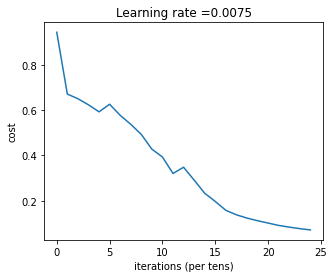


-------------------------------------------------------

the Accuracy on the training set is
Accuracy: 0.9952153110047844

the Accuracy on the test set is
Accuracy: 0.74


In [92]:
arameters = L_layer_model_HE_and_xavier_and_reg(x_train, y_train, layers_dims, num_iterations=2500, print_cost=True)

print ('\n' + "-------------------------------------------------------" + '\n')  


print("the Accuracy on the training set is")
train_accuracy = predict(x_train, y_train, parameters)
print()
print("the Accuracy on the test set is")
test_accuracy = predict(x_test, y_test, parameters)